In [1]:
import csv
import statistics
import time
from collections import defaultdict, Counter

# === Start Timer ===
start = time.time()

# === Utility Functions ===
def load_data(filepath):
    with open(filepath, 'r', encoding='utf-8') as f:
        return list(csv.DictReader(f))

def is_number(s):
    try: float(s); return True
    except: return False

def get_numeric_columns(data):
    return [col for col in data[0] if all(is_number(row[col]) or row[col]=='' for row in data[:100])]

def compute_stats(data, column):
    values = [float(row[column]) for row in data if is_number(row[column])]
    if not values:
        return {
            'count': 0,
            'mean': None,
            'min': None,
            'max': None,
            'std': None
        }
    return {
        'count': len(values),
        'mean': round(statistics.mean(values), 2),
        'min': min(values),
        'max': max(values),
        'std': round(statistics.stdev(values), 2) if len(values) > 1 else 0
    }

def compute_categorical_stats(data, column):
    values = [row[column] for row in data if row[column]]
    freq = Counter(values)
    return {
        'count': len(values),
        'unique': len(set(values)),
        'most_common': freq.most_common(1)[0] if freq else None
    }

def group_by(data, keys):
    grouped = defaultdict(list)
    for row in data:
        if all(k in row for k in keys):
            key = tuple(row[k] for k in keys)
            grouped[key].append(row)
    return grouped

# === Main Analysis ===

name = "Syracuse Men's Basketball"
path = "C:/Users/SHUBHAM/Downloads/period_03/syracuse_mens_basketball_stats.csv"

print(f"\n\n📊 === Analyzing {name} ===")
data = load_data(path)
numeric_cols = get_numeric_columns(data)

# === Overall Stats ===
print("\n=== Overall Stats ===")
for col in data[0]:
    print(f"\n{col}:")
    if col in numeric_cols:
        print(compute_stats(data, col))
    else:
        print(compute_categorical_stats(data, col))

# === Grouped Stats by Player ===
print("\n=== Grouped by Player ===")
groups = list(group_by(data, ['Player']).items())
print(f"📌 Total players: {len(groups)}")

for key, rows in groups[:3]:  # Show 3 example players
    print(f"\nPlayer: {key[0]}")
    for col in numeric_cols:
        print(f"  {col}:", compute_stats(rows, col))

# === End Timer ===
end = time.time()
print(f"\n⏱️ Script completed in {round(end - start, 2)} seconds.")




📊 === Analyzing Syracuse Men's Basketball ===

=== Overall Stats ===

#:
{'count': 32, 'mean': 14.25, 'min': 0.0, 'max': 51.0, 'std': 15.47}

Player:
{'count': 32, 'unique': 16, 'most_common': ('Starling, J.J.', 2)}

GP-GS:
{'count': 32, 'unique': 23, 'most_common': ('1-0', 5)}

MIN:
{'count': 32, 'mean': 339.06, 'min': 1.0, 'max': 987.0, 'std': 321.16}

AVG:
{'count': 32, 'mean': 15.23, 'min': 0.5, 'max': 34.6, 'std': 11.65}

FG-FGA:
{'count': 32, 'unique': 24, 'most_common': ('0-0', 8)}

FG%:
{'count': 32, 'mean': 0.33, 'min': 0.0, 'max': 0.826, 'std': 0.25}

3FG-FGA:
{'count': 32, 'unique': 22, 'most_common': ('0-0', 10)}

3FG%:
{'count': 32, 'mean': 0.21, 'min': 0.0, 'max': 0.462, 'std': 0.18}

FT-FTA:
{'count': 32, 'unique': 24, 'most_common': ('0-0', 8)}

FT%:
{'count': 32, 'mean': 0.56, 'min': 0.0, 'max': 1.0, 'std': 0.35}

OFF:
{'count': 32, 'mean': 14.88, 'min': 0.0, 'max': 114.0, 'std': 24.08}

DEF:
{'count': 32, 'mean': 40.34, 'min': 0.0, 'max': 203.0, 'std': 47.68}

TOT:


# Top Players Summary 

In [2]:
print("\n🏅 Top 5 Players by Points (PTS):")
player_pts = defaultdict(float)
for row in data:
    if is_number(row['PTS']):
        player_pts[row['Player']] += float(row['PTS'])

top_pts = sorted(player_pts.items(), key=lambda x: x[1], reverse=True)[:5]
for rank, (player, total_pts) in enumerate(top_pts, 1):
    print(f"{rank}. {player}: {round(total_pts)} PTS")



🏅 Top 5 Players by Points (PTS):
1. Starling, J.J.: 764 PTS
2. Lampkin Jr., Eddie: 617 PTS
3. Davis, Jyáre: 503 PTS
4. Bell, Chris: 489 PTS
5. Taylor, Lucas: 352 PTS


# Visualize Top Performers

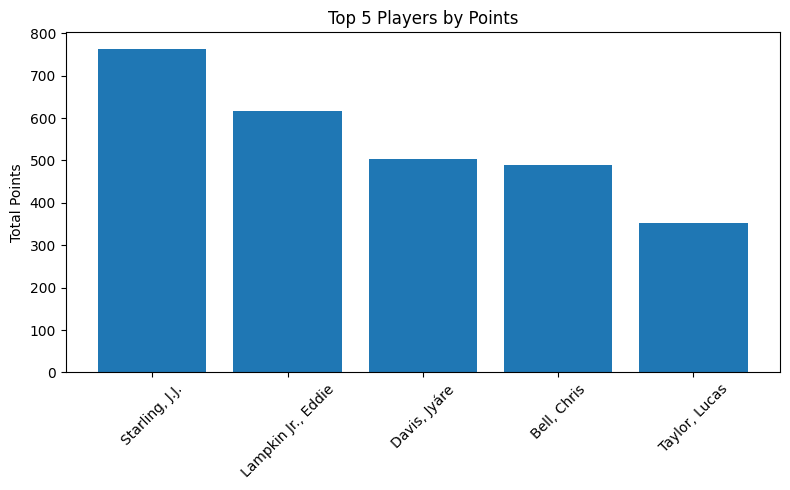

In [3]:
import matplotlib.pyplot as plt

players, points = zip(*top_pts)

plt.figure(figsize=(8, 5))
plt.bar(players, points)
plt.title("Top 5 Players by Points")
plt.ylabel("Total Points")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# Find Most Improved Players

In [8]:
# Create a simple impact score: PTS + A (Assists) + TOT (Total Rebounds)
impact = defaultdict(float)
for row in data:
    if all(is_number(row[stat]) for stat in ['PTS', 'A', 'TOT']):
        impact[row['Player']] += float(row['PTS']) + float(row['A']) + float(row['TOT'])

top_impact = sorted(impact.items(), key=lambda x: x[1], reverse=True)[:5]

print("\n📊 Game Changer Index (PTS + A + TOT):")
for rank, (player, score) in enumerate(top_impact, 1):
    print(f"{rank}. {player}: {round(score)}")





📊 Game Changer Index (PTS + A + TOT):
1. Lampkin Jr., Eddie: 1259
2. Starling, J.J.: 1049
3. Davis, Jyáre: 844
4. Carlos, Jaquan: 654
5. Bell, Chris: 606
